In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

print(np.__version__, cv2.__version__)


2.2.5 4.11.0


In [5]:
from numpy import random as r
>>> I = r.rand(256,256)

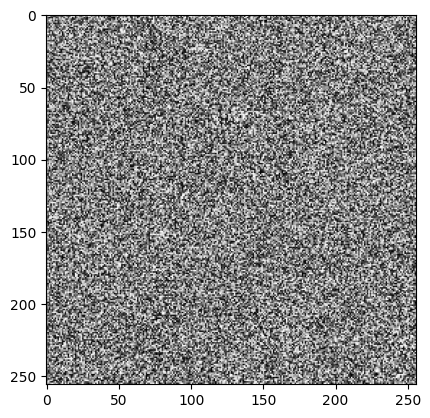

In [7]:
from matplotlib import pyplot as p
>>> I = r.rand(256,256)
>>> p.imshow(I, cmap='gray')
>>> p.show()

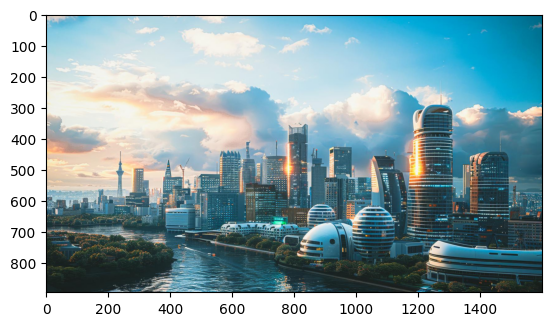

In [18]:
img_BGR = cv2.imread('ai2445CITY001-image_TP_V.jpg')

img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Text(0.5, 1.0, 'Averaging')

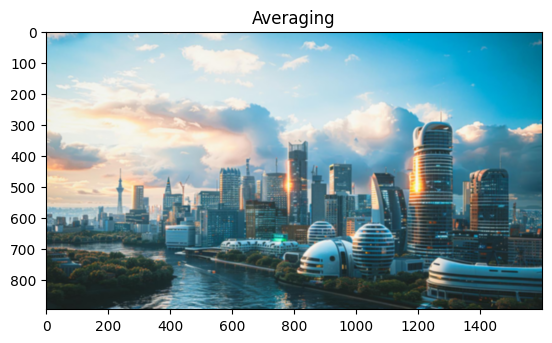

In [19]:
kernel = np.ones((5,5),np.float32)/25 #5x5平滑化フィルタのテンプレートを作成する
dst = cv2.filter2D(img,-1,kernel) #5x5平滑化フィルタを画像にかける
plt.imshow(dst) #平滑化した画像を表示する
plt.title('Averaging')

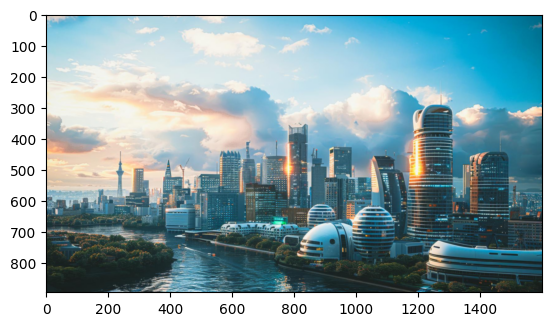

In [20]:
# ガウシアンフィルタ
dst = cv2.GaussianBlur(img, (3, 3), -1)

# ガウシアンフィルタ後の画像表示
plt.imshow(dst)

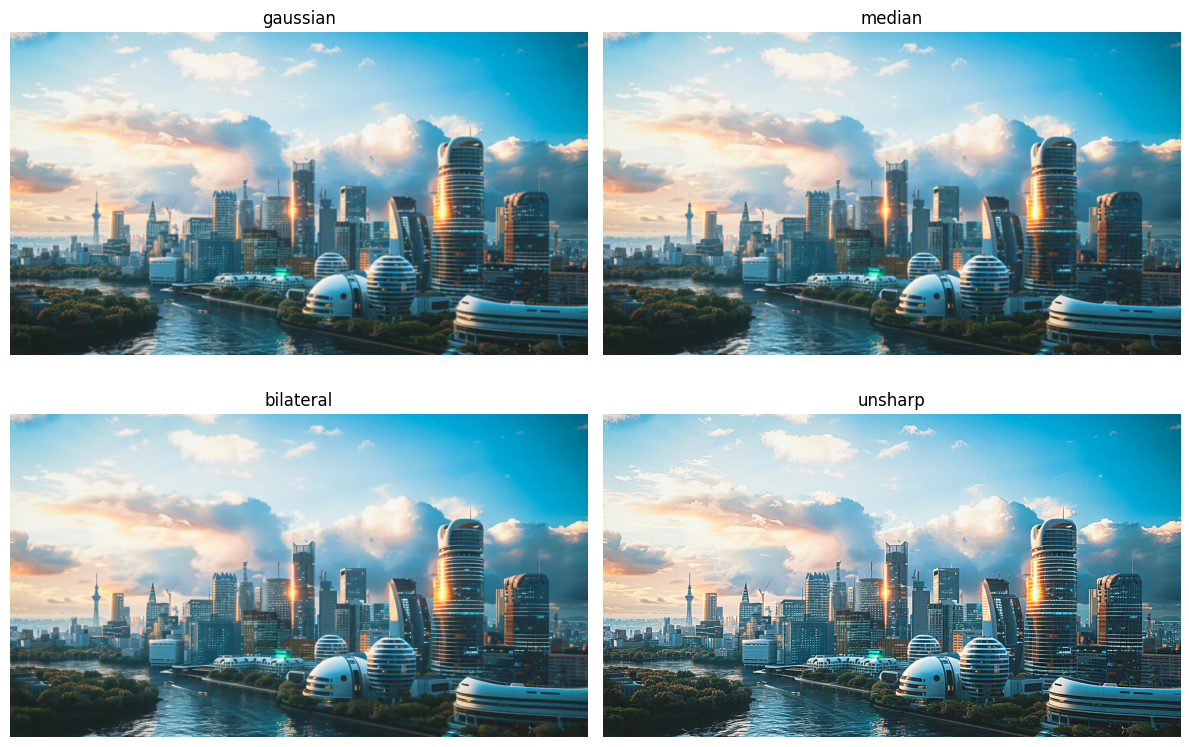

In [21]:
filtered = {
    'gaussian': cv2.GaussianBlur(img,(5,5),1.5),
    'median':   cv2.medianBlur(img,5),
    'bilateral':cv2.bilateralFilter(img,9,75,75),
    'unsharp':  None,
}
# アンシャープは少し手順が別
gauss = cv2.GaussianBlur(img, (9,9), 10.0)
filtered['unsharp'] = cv2.addWeighted(img, 1.5, gauss, -0.5, 0)

# 結果表示
plt.figure(figsize=(12,8))
for i,(name,im) in enumerate(filtered.items(),1):
    ax = plt.subplot(2,2,i)
    ax.imshow(im)
    ax.set_title(name)
    ax.axis('off')
plt.tight_layout()
plt.show()
